# Project 3: Housing Market Trends Visualizations

In [1]:
# All imports
import pandas as pd # This auto installs numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading dataset
house_stats = pd.read_csv('Data/Housing.csv')
house_stats.to_numpy()

# Cleaning dataset
missing_values_count = house_stats.isnull().sum() # Checked missing values
print("The missing values per column:")
print(missing_values_count) 

num_duplicates = house_stats.duplicated().sum() # Checked all rows for duplicate values
print("The number of duplicate values in this dataset is:", num_duplicates)

The missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
The number of duplicate values in this dataset is: 0


In [6]:
# Calculating the number of total bedrooms in each house / Feature Engineering  

# Selecting a column and everything within it
beds = house_stats['bedrooms'].to_numpy()

# Basic filtering with booleans, and adds 1 to beds where guestroom == "yes"
beds += (house_stats["guestroom"].to_numpy() == "yes").astype(int)

# Number of bathrooms
baths = house_stats["bathrooms"].to_numpy()

display(beds, 10) # Print the first ten beds
display(baths, 10)

array([4, 4, 3, 4, 5, 3, 4, 5, 5, 4, 3, 5, 4, 4, 3, 4, 5, 3, 4, 3, 3, 4,
       4, 4, 3, 5, 4, 3, 5, 4, 3, 3, 4, 4, 6, 3, 3, 4, 4, 4, 3, 3, 3, 4,
       4, 3, 3, 3, 3, 4, 3, 3, 5, 3, 4, 3, 4, 5, 5, 4, 4, 2, 4, 4, 3, 3,
       2, 3, 3, 4, 3, 4, 3, 2, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 5, 3, 3, 4, 3, 4, 3, 3, 4, 3, 5, 3, 3, 4, 4, 4, 3, 4, 3, 4, 5,
       4, 3, 6, 3, 3, 4, 4, 5, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 4, 5,
       3, 3, 3, 3, 4, 4, 3, 4, 3, 5, 4, 5, 5, 3, 2, 3, 3, 4, 4, 4, 6, 3,
       3, 3, 4, 5, 3, 4, 5, 4, 5, 4, 4, 4, 3, 2, 4, 4, 3, 3, 4, 4, 4, 5,
       3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 2, 3, 2, 3, 4, 4, 4, 3, 4, 4, 4, 3,
       3, 3, 3, 4, 2, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 2, 3,
       4, 4, 2, 3, 2, 2, 3, 2, 3, 5, 2, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3,
       3, 3, 4, 3, 3, 4, 3, 5, 3, 3, 3, 2, 4, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       2, 3, 3, 3, 4, 3, 3, 5, 4, 4, 4, 2, 2, 2, 3, 2, 2, 2, 4, 4, 2, 4,
       3, 3, 3, 3, 4, 3, 4, 2, 4, 3, 3, 3, 3, 3, 3,

10

array([2, 4, 2, 2, 1, 3, 3, 3, 1, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 3, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1,

10

# Visualizations

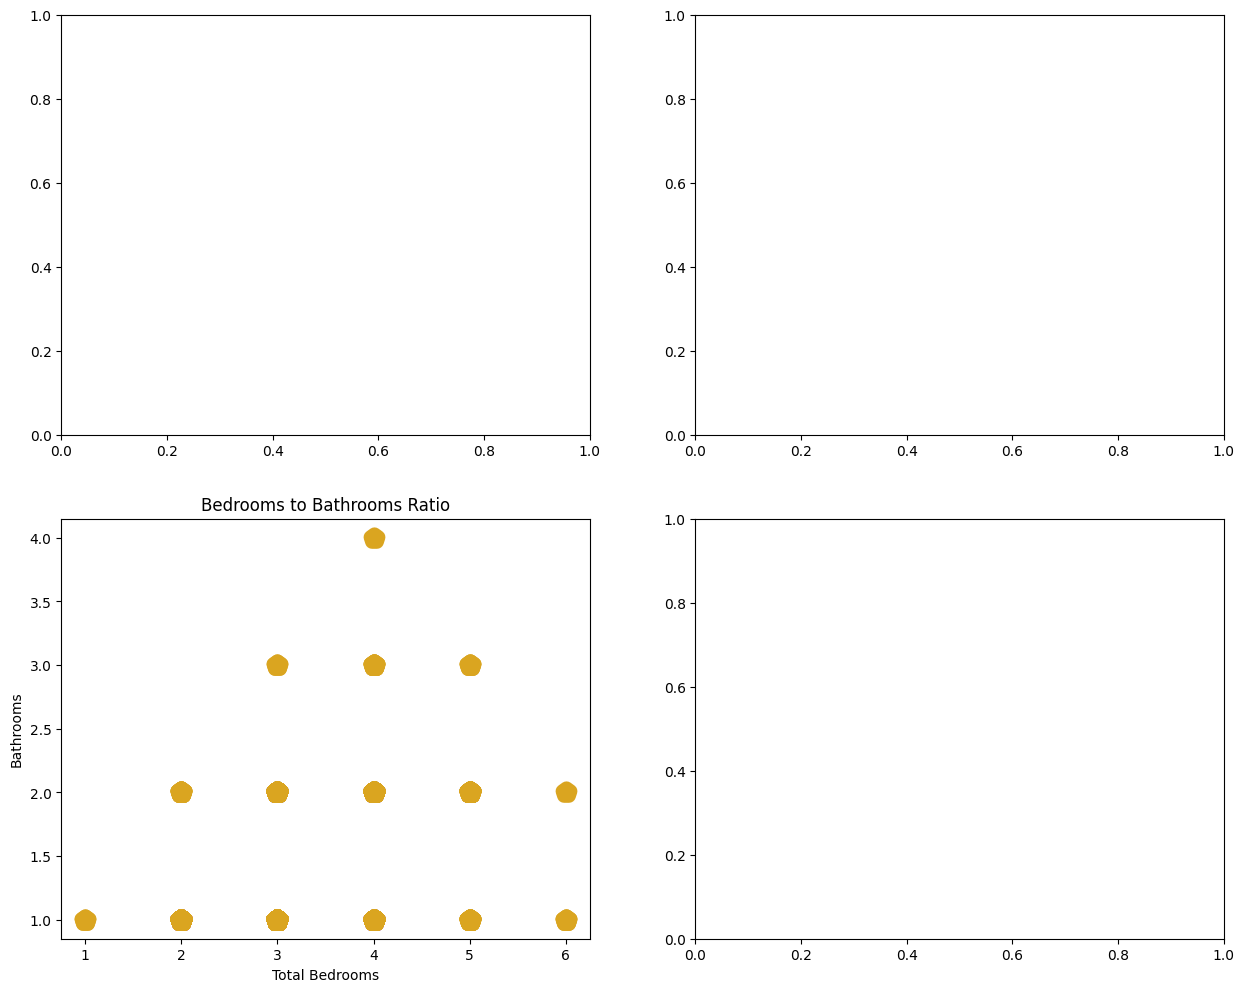

In [36]:
fig, axes = plt.subplots(2, 2, figsize = (15, 12))

axes[1, 0].scatter(beds, baths, marker = 'p', color = 'goldenrod', linewidth = 10) # Bottom left spot is this scatter plot
axes[1,0].set_title("Bedrooms to Bathrooms Ratio")
axes[1,0].set_xlabel("Total Bedrooms")
axes[1,0].set_ylabel("Bathrooms")

plt.show() # Seems like 4 bedrooms is the best, more than that seems to be just empty rich mansions